In [247]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(7, 7)})

pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", lambda x: f'{x:.2f}')

import warnings
warnings.filterwarnings("ignore")

In [15]:
def std_col_names(df):
    """
    - Convert feature names to lower case
    """
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    return df


In [17]:
os.listdir('./data/')

['sample_submission.csv', 'train.csv', 'test.csv']

In [82]:
# Load DF
df = std_col_names(pd.read_csv('./data/train.csv'))
df.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.00,107934.04,612.00,Unknown,1.00,1.00,33070.28,18690.93,73,544.00,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.00,109862.62,2771.00,Laborers,2.00,0.00,15329.53,37745.19,52,857.00,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.00,230153.17,204.00,Laborers,2.00,0.00,48416.60,41598.36,43,650.00,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.00,122325.82,11941.00,Core staff,2.00,0.00,22574.36,32627.76,20,754.00,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.00,387286.00,1459.00,Core staff,1.00,0.00,38282.95,52950.64,75,927.00,0,0,0


In [36]:
# Observe missing data and feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [48]:
# Find out missing column names
missing_cols = df.columns[df.isnull().any()].to_list()
print('Features with missing values: ')
missing_cols

Features with missing values: 


['owns_car',
 'no_of_children',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_score']

In [47]:
# Evaluate count of missing values
missing_cols_count = df[missing_cols].isnull().sum()
print('Number of missing values for each feature: ')
missing_cols_count

Number of missing values for each feature: 


owns_car                547
no_of_children          774
no_of_days_employed     463
total_family_members     83
migrant_worker           87
yearly_debt_payments     95
credit_score              8
dtype: int64

In [50]:
df.describe?

In [87]:
# View data distributions
print('Descriptive stats of features: ')
df.describe().loc[['min', 'max', 'mean', '50%']]

Descriptive stats of features: 


,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
min,23.00,0.00,27170.61,2.00,1.00,0.00,2237.47,4003.14,0.00,500.00,0.00,0.00,0.00
max,55.00,9.00,140759012.73,365252.00,10.00,1.00,328112.86,31129970.49,99.00,949.00,2.00,1.00,1.00
mean,38.99,0.42,200655.62,67609.29,2.16,0.18,31796.97,43548.42,52.24,782.79,0.06,0.05,0.08
50%,39.00,0.00,171714.91,2224.00,2.00,0.00,29081.65,35688.04,54.00,786.00,0.00,0.00,0.00


### Some insights
- Minimum age: 23, Maximum age: 55
- Customer with max number of children is 9!! Quite an outlier
- 17% of the population are migrant workers
- The yearly debts amount to x/customer on an average
- Customers on an average use around 52% of their total credit limit 
- Median net income is $172k  

- Mean yearly debt payments stand at $31976
- 8% of the population have defaulted on their credit bills; indicating an imbalance, as is with such datasets


In [60]:
eda_df = df.dropna()
print(f'Number of records after dropping null values are {len(eda_df)}, {len(df) - len(eda_df)} records less than original data')

Number of records after dropping null values are 43509, 2019 records less than original data


In [64]:
print('Unique values in each feature: ')
df.nunique()

Unique values in each feature: 


customer_id                45528
name                        4010
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                10
net_yearly_income          45502
no_of_days_employed         7874
occupation_type               19
total_family_members          10
migrant_worker                 2
yearly_debt_payments       45251
credit_limit               45371
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
credit_card_default            2
dtype: int64

In [83]:
# Observe unique values in features of interest
for col in ['gender', 'occupation_type']:
    print(col)
    print(eda_df[col].unique())

gender
['F' 'M' 'XNA']
occupation_type
['Unknown' 'Laborers' 'Core staff' 'Accountants' 'High skill tech staff'
 'Sales staff' 'Managers' 'Drivers' 'Medicine staff' 'Cleaning staff'
 'HR staff' 'Security staff' 'Cooking staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Private service staff' 'Secretaries'
 'Realty agents' 'IT staff']


In [86]:
eda_df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

## Visualizing data

Questions:
- Histograms for target variable (`credit_card_default`)
    1) age 
    2) gender
    3) no_of_children
    4) migrant_worker
    5) credit_limit
    6) credit_limit_used
    7) credit_score
    8) default_in_last_6months
    9) occupation
    10) months_employed
- Scatter
    1)  credit_limit vs credit_score 
    2) credit_limit vs credit_limit_used
    3) net_yearly_income vs credit_limit

Text(0.5, 1.0, 'Age distribution in credit card default')

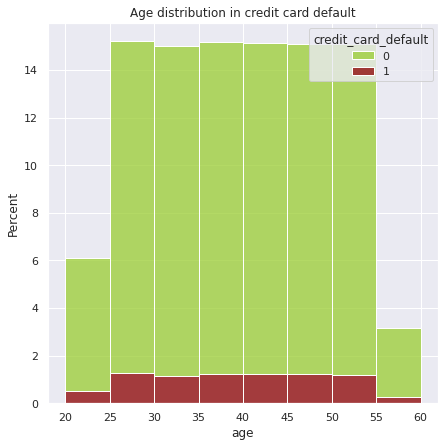

In [156]:
sns.histplot(eda_df, x= 'age', hue= 'credit_card_default', stat= 'percent', bins= 8, binrange= (20,60), palette= ['yellowgreen', 'darkred'], multiple= 'stack').set_title('Age distribution in credit card default')

Text(0.5, 1.0, 'Inclusivve Gender distribution in credit card default')

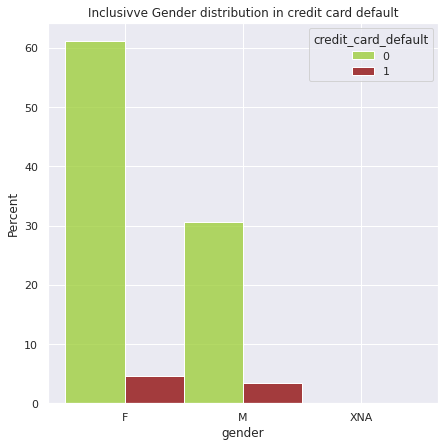

In [157]:
sns.histplot(eda_df, x= 'gender', hue= 'credit_card_default', stat= 'percent', palette= ['yellowgreen', 'darkred'], multiple= 'dodge').set_title('Inclusivve Gender distribution in credit card default')

Text(0.5, 1.0, 'Exclusive Gender distribution in credit card default')

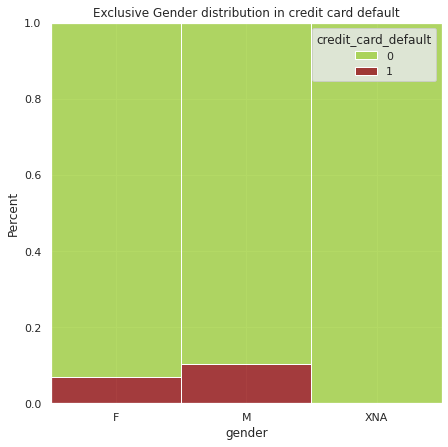

In [158]:
sns.histplot(eda_df, x= 'gender', hue= 'credit_card_default', stat= 'percent', palette= ['yellowgreen', 'darkred'], multiple= 'fill').set_title('Exclusive Gender distribution in credit card default')

In [159]:
eda_df['gender'].value_counts()

F      28629
M      14879
XNA        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of children per customer distribution in credit card default')

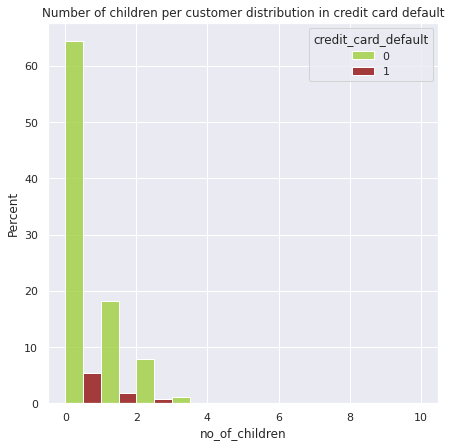

In [185]:
sns.histplot(eda_df, x= 'no_of_children', hue= 'credit_card_default', stat= 'percent', bins= 10, binrange= (0,10), palette= ['yellowgreen', 'darkred'], multiple= 'dodge').set_title('Number of children per customer distribution in credit card default')

Text(0.5, 1.0, 'Number of children per customer distribution in credit card default')

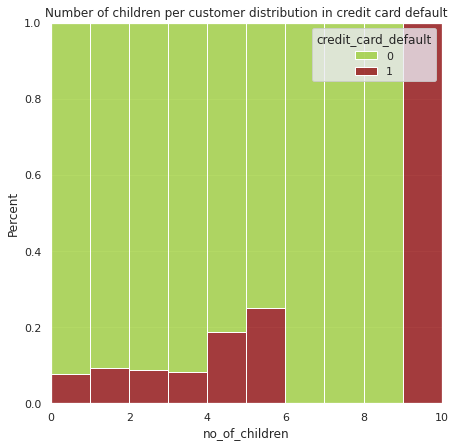

In [183]:
sns.histplot(eda_df, x= 'no_of_children', hue= 'credit_card_default', stat= 'percent', bins= 10, binrange= (0,10), palette= ['yellowgreen', 'darkred'], multiple= 'fill').set_title('Number of children per customer distribution in credit card default')

Text(0.5, 1.0, 'Migrant worker distribution in credit card default')

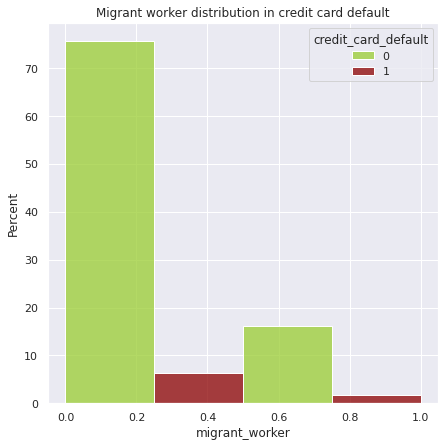

In [161]:
sns.histplot(eda_df, x= 'migrant_worker', hue= 'credit_card_default', stat= 'percent', bins= 2, palette= ['yellowgreen', 'darkred'], multiple= 'dodge').set_title('Migrant worker distribution in credit card default')

In [187]:
print('95th percentile of credit limit value: ', sep='\t')
eda_df['credit_limit'].quantile(0.95)

95th percentile of credit limit value: 


94894.20599999998

Text(0.5, 1.0, 'Credit limit exclusive (95 percentile) distribution in credit card default')

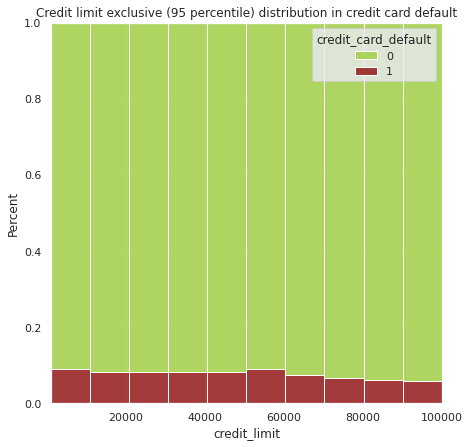

In [163]:
sns.histplot(eda_df, x= 'credit_limit', hue= 'credit_card_default', stat= 'percent', bins= 10, binrange= (1000,100000 ), palette= ['yellowgreen', 'darkred'], multiple= 'fill').set_title('Credit limit exclusive (95 percentile) distribution in credit card default')

Text(0.5, 1.0, 'Credit limit inclusive (95 percentile) distribution in credit card default')

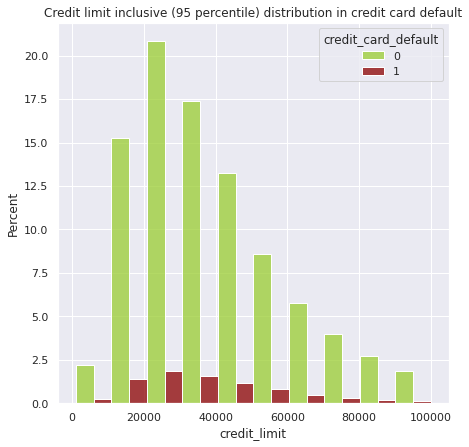

In [164]:
sns.histplot(eda_df, x= 'credit_limit', hue= 'credit_card_default', stat= 'percent', bins= 10, binrange= (1000,100000 ), palette= ['yellowgreen', 'darkred'], multiple= 'dodge').set_title('Credit limit inclusive (95 percentile) distribution in credit card default')

Text(0.5, 1.0, 'Credit usage distribution in credit card default')

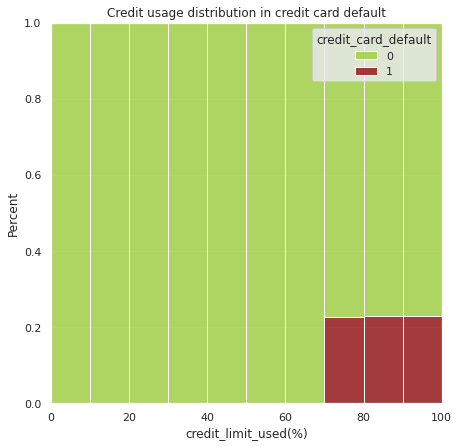

In [175]:
sns.histplot(eda_df, x= 'credit_limit_used(%)', hue= 'credit_card_default', stat= 'percent', bins= 10, binrange= (0, 100 ), palette= ['yellowgreen', 'darkred'], multiple= 'fill').set_title('Credit usage distribution in credit card default')

In [194]:
print('Distribution of credit default when credit usage exceeds 70% of limit: ')
(eda_df[eda_df['credit_card_default']==1]['credit_limit_used(%)']>70).value_counts(normalize=True)

Distribution of credit default when credit usage exceeds 70% of limit: 


True    0.97
False   0.03
Name: credit_limit_used(%), dtype: float64

Text(0.5, 1.0, 'Credit score distribution in credit card default')

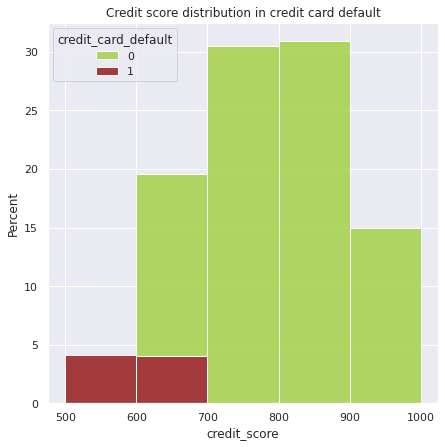

In [195]:
sns.histplot(eda_df, x= 'credit_score', hue= 'credit_card_default', stat= 'percent', bins= 5, binrange= (500, 1000 ), palette= ['yellowgreen', 'darkred'], multiple= 'stack').set_title('Credit score distribution in credit card default')

In [192]:
print('Distribution of credit default when credit score is less than 700: ')
(eda_df[eda_df['credit_score']<=700]['credit_card_default']).value_counts(normalize=True)

Distribution of credit default when credit score is less than 700: 


0   0.66
1   0.34
Name: credit_card_default, dtype: float64

In [252]:
occ_df = eda_df[['occupation_type', 'credit_card_default']].groupby('occupation_type').mean().sort_values(by= 'credit_card_default', ascending= False)
occ_df

,credit_card_default
occupation_type,
Low-skill Laborers,0.15
Drivers,0.12
Cooking staff,0.11
Waiters/barmen staff,0.11
Security staff,0.10
Laborers,0.10
Cleaning staff,0.10
Sales staff,0.10
Realty agents,0.10


Text(0.5, 1.0, 'Occupation type distribution in credit card default')

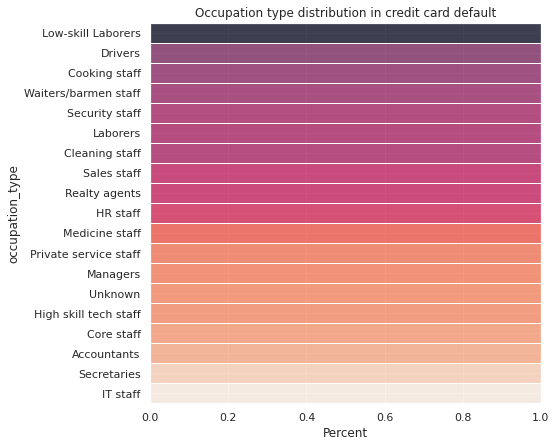

In [255]:
sns.histplot(occ_df, y= 'occupation_type', hue= 'credit_card_default', stat= 'percent', palette= 'rocket_r', multiple= 'fill', legend= False, cbar= True).set_title('Occupation type distribution in credit card default')

Text(0.5, 1.0, ' Inclusive Employment period distribution in credit card default')

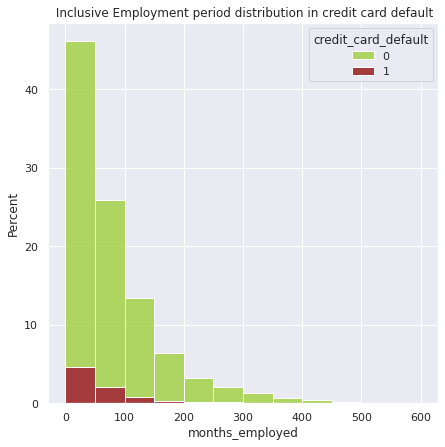

In [259]:
eda_df['months_employed'] = eda_df['no_of_days_employed'] / 30
sns.histplot(eda_df, x= 'months_employed', hue= 'credit_card_default', stat= 'percent', bins= 12, binrange= (0, 600 ), palette= ['yellowgreen', 'darkred'], multiple= 'stack').set_title(' Inclusive Employment period distribution in credit card default')

Text(0.5, 1.0, ' Exclusive Employment period distribution in credit card default')

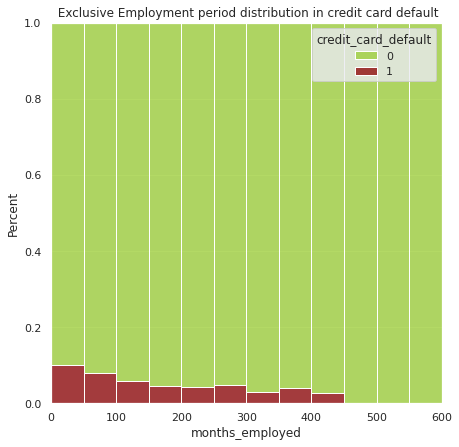

In [260]:
eda_df['months_employed'] = eda_df['no_of_days_employed'] / 30
sns.histplot(eda_df, x= 'months_employed', hue= 'credit_card_default', stat= 'percent', bins= 12, binrange= (0, 600 ), palette= ['yellowgreen', 'darkred'], multiple= 'fill').set_title(' Exclusive Employment period distribution in credit card default')

### Observations
- Age spread is pretty even, except for extreme bins
- More females are issued credit cards than males, however males are likely to default more than women
- XNA gender count is negliglible
- Customers having 4 or more children are outliers
- Spread of credit limit is even in terms of default
- Most people are provided credit limit in range $20-30k
- Credit limit used seems to be a critical feature. 97% of customers who have consumed greater than 70% have credit limit have defaulted
- Customers with credit score less than 700 are highly likely to default
- Low-skill labour staff are more likely to default
- Customers with lesser employment experience are more likely to default

## References
[pd float format](https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results)